In [21]:
import os
import cv2
import matplotlib.pyplot as plt  

In [22]:
path='brain_tumor'

In [23]:
list(os.listdir(path+'/Training'))

['Cat', 'Dog']

In [24]:
labels=['Cat', 'Dog']
class_map={
    'Cat':0,
    'Dog':1,
   
}

Images=[]
Labels=[]
h,w=224,224

## Read Data

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
for label in labels:
    folderpath=os.path.join(path+'/Training/',label)
    for j in os.listdir(folderpath):
        img  = Image.open(os.path.join(folderpath,j))
        img=img.resize((h,w))
        Images.append(img)
        Labels.append(class_map[label])
    


In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
for label in labels:
    folderpath=os.path.join(path+'/Testing/',label)
    for j in os.listdir(folderpath):
        img  = Image.open(os.path.join(folderpath,j))
        img=img.resize((h,w))
        Images.append(img)
        Labels.append(class_map[label])
    

In [27]:
import numpy as np
for i in range(len(Images)):
    Images[i]=np.array(Images[i])
    

In [28]:
X=np.array(Images)
y=np.array(Labels)

In [29]:
X.shape,y.shape

((936, 224, 224, 3), (936,))

# Visualization

In [30]:
from sklearn.utils import shuffle
X,y=shuffle(X,y)

In [31]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [32]:
from sklearn.model_selection import train_test_split 
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [33]:
from keras import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(h,w,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                11944000  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
from keras.models import load_model
model=load_model('model.h5')



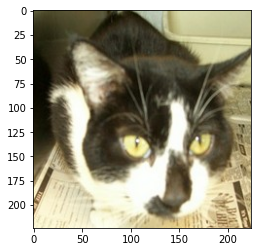

In [36]:

plt.imshow(train_X[2].reshape(224,224,3))
plt.show()


In [37]:
ypred=model.predict_classes(train_X[2].reshape(-1,h,w,3))[0]

In [38]:
ypred

0

In [39]:
print("prediction : ",ypred)


prediction :  0


In [40]:
from tkinter import *
from tkinter import ttk
from PIL import ImageTk,Image
from tkinter import filedialog



In [41]:
def openfilename():

    # open file dialog box to select image
    # The dialogue box has a title "Open"
    filename = filedialog.askopenfilename(title ='"pen')
    return filename

In [42]:
def open_img1():
    # Select the Imagename from a folder
    x = openfilename()

    # opens the image
    img = Image.open(x)
    img = img.resize((224, 224))

    teimg=img.resize((400, 400))
    teimg = ImageTk.PhotoImage(teimg)
    
    panel.configure(image=teimg)
    panel.image = teimg

    
    
    return img


In [43]:
root=Tk()
style = ttk.Style()
root.geometry("800x800")
root.title("Cat/Dog")

frame = Frame(root, relief = 'sunken',
              bd = 1, bg = 'white')
frame.pack(fill = 'both', expand = True,
           padx = 10, pady = 10)

lbl1=ttk.Label(frame,text="Welcome in Cat or Dog Game",font=('Times New Roman',40,'italic'),foreground="red",background = 'white')
lbl1.pack(pady = 10, expand = True)

img = Image.open("hema.jpeg")
img = ImageTk.PhotoImage(img)
panel = Label(frame, image=img)
panel.image = img
panel.pack()



button1=ttk.Button(frame,text="Let's Begin")
style.configure('TButton',foreground = 'red',font=('Times New Roman',40,'italic'))
button1.pack(pady = 10, expand = True)
button1.configure(style='TButton')




def predict():
    global z
    z=open_img1()
    z=np.array(z)
    ypred=model.predict_classes((z).reshape(-1,h,w,3))[0]

    if ypred == 0:
        Output.insert(END,"This is an image of a cat")
    else:
        Output.insert(END,"This is an image of a dog")


###########################################  The new window 
######## Top frame
def butt1clk():
    global new_window
    new_window = Toplevel(root)
    new_window.title("New Window")
    new_window.geometry("800x800")
    
    frame2 = Frame(new_window, relief = 'sunken',
              bd = 1, bg = 'white')
    frame2.pack(fill = 'both', expand = True,padx = 10, pady = 10)

    lbl2 = ttk.Label(frame2,text="Please select an image of either a dog or a cat",font=('Times New Roman',30,'italic')
                     ,foreground="black")
    lbl2.grid(row=0,column=0,columnspan=2,padx = 5, pady = 10)
    

    frame2.rowconfigure(0,weight=1)
    frame2.rowconfigure(1,weight=1)
    frame2.rowconfigure(2,weight=1)
    frame2.rowconfigure(3,weight=1)

    frame2.columnconfigure(0,weight=1)
    frame2.columnconfigure(1,weight=1)

    global panel
    panel = Label(frame2)
    panel.grid(row=2,column=0,columnspan=3,padx = 5, pady = 10)
    
    
    button4=ttk.Button(frame2,text='Browse & Check',command= predict, )
    button4.grid(row=4,column=0,columnspan=2,padx = 5, pady = 10)
    style.configure('Info.TButton',font=('Times New Roman',30,'italic'),foreground="black")
    button4.configure(style='Info.TButton')
    
    lbl3 = ttk.Label(frame2,text="the Result",font=('Times New Roman',30,'italic'),foreground="black")
    lbl3.grid(row=3,column=0) 
    
    
    
    
       
    
    global Output
    Output = Text(frame2, height = 2,width = 25, bg = "light cyan",font=('Times New Roman',20,'italic'))
    Output.grid(row=3,column=1)
    
    
    
    
    
    
    
    
#########################################################
    
  
button1.config(command=butt1clk)



root.mainloop()